In [439]:
# Import Dependencies 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import quandl
import numpy as np
import pandas as pd
import time
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from statsmodels.tsa.stattools import coint
from scipy import stats

# API keys
quandl.ApiConfig.api_key = 'n8ytM4yxbemwLYG_yrRa'

In [716]:
# Ticker List
stocks_list = pd.read_csv("stocks_list.csv")
stocks_list = (list(stocks_list['0']))
print("length: ", len(stocks_list))

# make dataframe from stocks_list

df_stocks_list  = pd.DataFrame(stocks_list)
df_stocks_list.columns = ["ticker"]
len(stocks_list)

length:  815


815

In [717]:
stocks_list=stocks_list[:100]
stocks_list
len(stocks_list)

100

Query Number:  1               AEP
Date             
2019-01-02  74.61
Query Number:  2               ATO
Date             
2019-01-02  92.29
Query Number:  3                DTE
Date              
2019-01-02  110.18
Query Number:  4                ED
Date             
2019-01-02  76.32
Query Number:  5               ETR
Date             
2019-01-02  85.65
Query Number:  6                NEE
Date              
2019-01-02  172.68
Query Number:  7                NI
Date             
2019-01-02  25.29
Query Number:  8               OGE
Date             
2019-01-02  39.17
Query Number:  9               WEC
Date             
2019-01-02  69.11
Query Number:  10               XEL
Date             
2019-01-02  49.16
Query Number:  11               AFL
Date             
2019-01-02  44.59
Query Number:  12               AJG
Date             
2019-01-02  72.66
Query Number:  13                AON
Date              
2019-01-02  143.58
Query Number:  14               BRO
Date             
2019-01-02

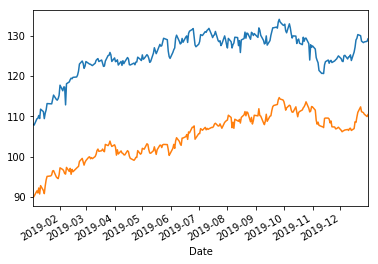

In [718]:
# Pull Stock Prices
list_of_dataframes = []
tickersss = ['ATO','DTE','ED','ETR','NI','WEC','NI', 'ETR']
query_counter = 1
for stock in stocks_list:
    
    query_prices = quandl.get(f'EOD/{stock}',start_date='2019-01-01', end_date='2020-01-01',paginate=True)
    stock_prices = query_prices.iloc[:,:1]
    stock_prices = stock_prices.rename(columns={"Open": f"{stock}"})
    print("Query Number: ", query_counter, stock_prices[:1])
    query_counter = query_counter+ 1 
    list_of_dataframes.append(stock_prices)
    
stock_prices= pd.concat(list_of_dataframes, axis=1)
stock_prices = stock_prices.replace(to_replace ="#NAME?",value = np.nan)  
stock_prices = stock_prices.interpolate()
stock_prices.to_csv("stock_prices.csv")
stock_returns = stock_prices.pct_change()
stock_prices = stock_prices.drop(stock_returns.index[:1])
stock_prices['DTE'].plot()
stock_prices['ATO'].plot()


,AEP,ATO,DTE,ED,ETR,NEE,NI,OGE,WEC,XEL,...,EWBC,CFG,NTRS,COF,PBCT,RF,PNM,NWE,POR,ACC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.022383,-0.026222,-0.019786,-0.015461,-0.021133,-0.016041,-0.006327,-0.024509,-0.023586,-0.018104,...,0.032054,0.033979,0.020498,0.028326,0.020266,0.032675,-0.016129,-0.021090,-0.025427,-0.021458
2019-01-04,-0.008500,0.003338,-0.001574,-0.001597,-0.002743,-0.004473,-0.007959,0.006281,-0.001482,-0.011809,...,0.017003,0.018403,-0.002869,0.014099,0.010959,0.024283,-0.010184,-0.001896,-0.004948,0.024670
2019-01-07,0.008573,0.014417,0.014467,0.014396,0.010405,0.014780,0.029683,0.014044,0.009053,0.011740,...,0.024967,0.020975,0.010791,0.019439,0.013550,0.014368,0.018319,0.020549,0.005651,0.004864
2019-01-08,-0.000274,-0.005466,0.001280,-0.008147,-0.002959,0.002913,-0.000390,0.000513,-0.000735,0.000000,...,0.009352,0.014223,0.007355,0.018689,0.016043,0.031161,-0.004189,-0.002707,-0.001349,0.001452
2019-01-09,0.011245,0.013521,0.006208,0.003047,0.013653,0.008191,0.018316,0.012561,0.007948,0.012640,...,0.012066,0.009660,-0.006948,0.000372,-0.000658,0.002747,0.023756,0.020699,0.015530,0.022233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.013044,-0.010591,-0.010304,-0.011999,-0.007747,-0.015940,-0.012945,-0.011259,-0.017432,-0.028580,...,-0.004461,-0.001969,-0.001782,-0.002999,-0.004132,-0.004632,-0.016585,-0.017075,-0.021288,-0.006691
2019-12-26,0.000320,-0.002159,-0.002952,-0.000111,0.001595,0.005609,0.000000,0.001139,0.004271,0.004637,...,0.004481,0.001480,0.003852,0.000970,0.001186,0.002327,-0.004167,-0.000981,-0.002876,0.001956
2019-12-27,0.000959,-0.003516,0.001325,-0.000891,0.001760,0.008450,-0.004007,0.002502,0.000654,-0.000318,...,-0.003447,0.004680,0.000468,0.004556,-0.001776,0.005804,0.004782,0.004487,-0.000361,0.008241


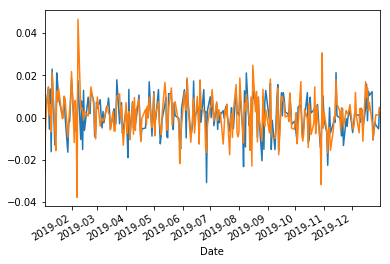

In [719]:
# Get Stock Returns, percentage changes from previous day

stock_returns= stock_returns
stock_returns=stock_returns.drop(stock_returns.index[:1])
stock_returns.to_csv("stock_returns.csv")
stock_returns['ATO'].plot()
stock_returns['DTE'].plot()

stock_returns

In [720]:
query_fundamentals = quandl.get_table("SHARADAR/TICKERS", paginate=True)
current_tickers = list(stock_returns.columns)
list_stocks= pd.DataFrame({'ticker': current_tickers})
query_fundamentals.drop_duplicates(subset='ticker')
fundamentals = list_stocks.merge(query_fundamentals, on="ticker")
fundamentals.to_csv("fundamentals.csv")
fundamentals

,ticker,table,permaticker,name,exchange,isdelisted,category,cusips,siccode,sicsector,...,currency,location,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,secfilings,companysite
0,AEP,SF1,199972,American Electric Power Co Inc,NYSE,N,Domestic Primary,025537101,4911.0,Transportation Communications Electric Gas And...,...,USD,Ohio; U.S.A,2019-10-24,2014-12-17,1986-01-01,2020-01-16,1996-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.aep.com
1,AEP,SEP,199972,American Electric Power Co Inc,NYSE,N,Domestic Primary,025537101,4911.0,Transportation Communications Electric Gas And...,...,USD,Ohio; U.S.A,2020-01-16,2014-12-17,1986-01-01,2020-01-16,1996-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.aep.com
2,ATO,SF1,198743,Atmos Energy Corp,NYSE,N,Domestic,049560105,4924.0,Transportation Communications Electric Gas And...,...,USD,Texas; U.S.A,2019-11-16,2015-03-20,1986-01-01,2020-01-16,1996-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.atmosenergy.com
3,ATO,SEP,198743,Atmos Energy Corp,NYSE,N,Domestic,049560105,4924.0,Transportation Communications Electric Gas And...,...,USD,Texas; U.S.A,2020-01-16,2015-03-20,1986-01-01,2020-01-16,1996-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.atmosenergy.com
4,DTE,SF1,197304,Dte Energy Co,NYSE,N,Domestic Primary,233331107,4911.0,Transportation Communications Electric Gas And...,...,USD,Michigan; U.S.A,2019-10-28,2014-10-09,1986-01-01,2020-01-16,1996-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://newlook.dteenergy.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NWE,SEP,199472,Northwestern Corp,NYSE,N,Domestic,668074305 668074115,4931.0,Transportation Communications Electric Gas And...,...,USD,South Dakota; U.S.A,2020-01-16,2014-10-10,2007-12-28,2020-01-16,2004-09-30,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.northwesternenergy.com
196,POR,SF1,198529,Portland General Electric Co,NYSE,N,Domestic,736508847,4911.0,Transportation Communications Electric Gas And...,...,USD,Oregon; U.S.A,2019-11-01,2014-10-13,2006-03-31,2020-01-16,2005-03-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.portlandgeneral.com
197,POR,SEP,198529,Portland General Electric Co,NYSE,N,Domestic,736508847,4911.0,Transportation Communications Electric Gas And...,...,USD,Oregon; U.S.A,2020-01-16,2014-10-13,2006-03-31,2020-01-16,2005-03-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.portlandgeneral.com
198,ACC,SF1,195193,American Campus Communities Inc,NYSE,N,Domestic,024835100,6798.0,Finance Insurance And Real Estate,...,USD,Texas; U.S.A,2019-11-02,2015-03-19,2004-08-16,2020-01-16,2002-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.americancampus.com


In [721]:
# Columns Allfundamentals
print(list(fundamentals.columns))

['ticker', 'table', 'permaticker', 'name', 'exchange', 'isdelisted', 'category', 'cusips', 'siccode', 'sicsector', 'sicindustry', 'famasector', 'famaindustry', 'sector', 'industry', 'scalemarketcap', 'scalerevenue', 'relatedtickers', 'currency', 'location', 'lastupdated', 'firstadded', 'firstpricedate', 'lastpricedate', 'firstquarter', 'lastquarter', 'secfilings', 'companysite']


In [722]:
# Columns Selected fundamentals
selected_fundamentals = fundamentals[['ticker', 'scalemarketcap', 'scalerevenue','siccode']]
# Format column values to floats
selected_fundamentals['scalemarketcap'] = fundamentals['scalemarketcap'].str[:2]
selected_fundamentals['scalerevenue'] = fundamentals['scalerevenue'].str[:2]
selected_fundamentals=selected_fundamentals.rename(columns={'scalerevenue':'Financial Health','scalemarketcap':'Market Cap','siccode':'Industry'})

selected_fundamentals

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ticker,Market Cap,Financial Health,Industry
0,AEP,5,5,4911.0
1,AEP,5,5,4911.0
2,ATO,5,4,4924.0
3,ATO,5,4,4924.0
4,DTE,5,5,4911.0
...,...,...,...,...
195,NWE,4,3,4931.0
196,POR,4,4,4911.0
197,POR,4,4,4911.0
198,ACC,4,3,6798.0


In [642]:
############################# SET ALL TABLES TO HAVE SAME TICKETS FOR MACHINE LEARNING MODEL #############


In [723]:
selected_fundamentals = list_stocks.merge(selected_fundamentals, on="ticker")
selected_fundamentals = selected_fundamentals.drop_duplicates(subset="ticker")
fundamentals = selected_fundamentals.dropna()
filtered_stock_list = list(fundamentals['ticker'])
fundamentals = fundamentals.set_index('ticker')

prices =  stock_prices[filtered_stock_list]
returns =  stock_returns[filtered_stock_list]

fundamentals

,Market Cap,Financial Health,Industry
ticker,,,
AEP,5,5,4911.0
ATO,5,4,4924.0
DTE,5,5,4911.0
ED,5,5,4931.0
ETR,5,5,4911.0
...,...,...,...
RF,5,4,6021.0
PNM,4,4,4911.0
NWE,4,3,4931.0


In [724]:


fundamentals = fundamentals.rename_axis(None)


In [725]:
fundamentals


,Market Cap,Financial Health,Industry
AEP,5,5,4911.0
ATO,5,4,4924.0
DTE,5,5,4911.0
ED,5,5,4931.0
ETR,5,5,4911.0
...,...,...,...
RF,5,4,6021.0
PNM,4,4,4911.0
NWE,4,3,4931.0
POR,4,4,4911.0


In [813]:
N_PRIN_COMPONENTS = 10
pca = PCA(n_components=N_PRIN_COMPONENTS)
pca.fit(returns)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [814]:
pca.components_.T.shape

(100, 10)

In [815]:

X = np.hstack(
    (pca.components_.T,
     fundamentals['Market Cap'][returns.columns].values[:, np.newaxis],
     fundamentals['Financial Health'][returns.columns].values[:, np.newaxis])
)

print(X.shape)

(100, 12)


In [816]:
X = preprocessing.StandardScaler().fit_transform(X)
print(X.shape)

(100, 12)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [817]:


clf = DBSCAN(eps=1.9, min_samples=3)
print(clf)

clf.fit(X)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("\nClusters discovered: %d" % n_clusters_)

clustered = clf.labels_



DBSCAN(algorithm='auto', eps=1.9, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

Clusters discovered: 7


In [818]:


# the initial dimensionality of the search was
ticker_count = len(returns.columns)
print("Total pairs possible in universe: %d " % (ticker_count*(ticker_count-1)/2))



Total pairs possible in universe: 4950 


In [819]:
clustered_series = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

In [820]:


CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print("Clusters formed: %d" % len(ticker_count_reduced))
print("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())


Clusters formed: 7
Pairs to evaluate: 952


In [821]:
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

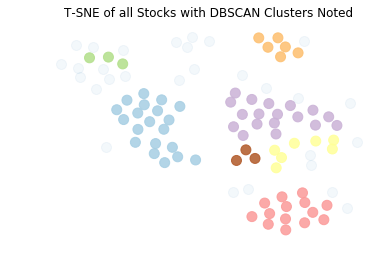

In [822]:
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')

plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with DBSCAN Clusters Noted');

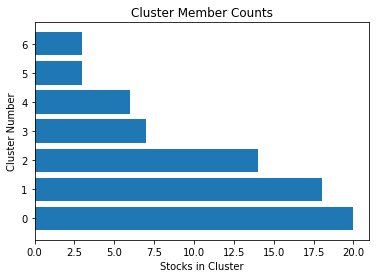

In [823]:
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number');

In [825]:
pricing = pd.read_csv("stock_prices.csv")


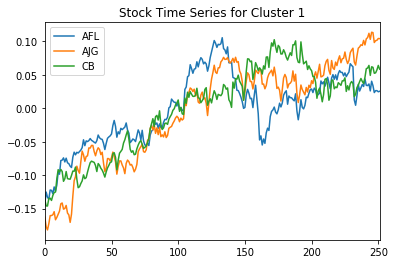

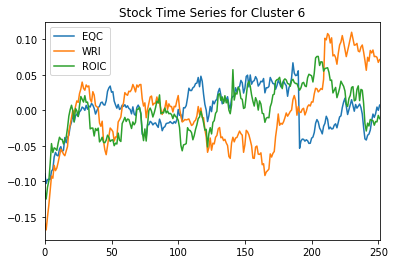

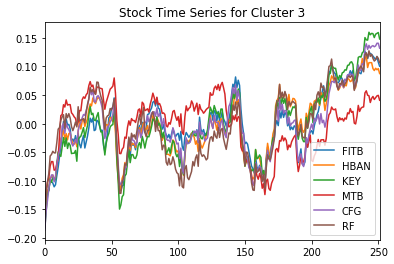

In [826]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]

# plot a handful of the smallest clusters
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 3)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(pricing[tickers].mean())
    data = np.log(pricing[tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % clust)
    

In [836]:
which_cluster = clustered_series.loc[('KEY')]
clustered_series[clustered_series == which_cluster]

FITB    3
HBAN    3
KEY     3
MTB     3
CFG     3
RF      3
dtype: int64

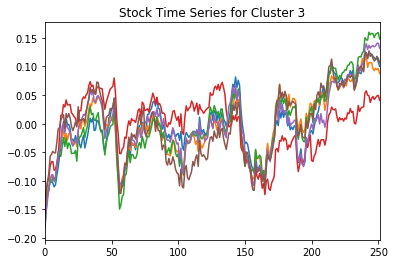

In [838]:

tickers = list(clustered_series[clustered_series==which_cluster].index)
means = np.log(pricing[tickers].mean())
data = np.log(pricing[tickers]).sub(means)
data.plot(legend=False, title="Stock Time Series for Cluster %d" % which_cluster);

In [839]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [840]:

cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(
        pricing[tickers]
    )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [841]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [842]:
pairs

[('ATO', 'WEC'),
 ('ATO', 'XEL'),
 ('ATO', 'AWK'),
 ('DTE', 'PNM'),
 ('ED', 'PNM'),
 ('ETR', 'SO'),
 ('NEE', 'SO'),
 ('OGE', 'WEC'),
 ('OGE', 'XEL'),
 ('OGE', 'AWK'),
 ('OGE', 'CMS'),
 ('OGE', 'AEE'),
 ('OGE', 'SO'),
 ('OGE', 'WTR'),
 ('OGE', 'PNM'),
 ('XEL', 'AWK'),
 ('BKH', 'AEE'),
 ('BKH', 'PNM'),
 ('AWK', 'POR'),
 ('AEE', 'PNM'),
 ('AEE', 'POR'),
 ('DRE', 'SUI'),
 ('DRE', 'MAA'),
 ('DRE', 'PLD'),
 ('FRT', 'WELL'),
 ('FRT', 'NNN'),
 ('FRT', 'SUI'),
 ('FRT', 'MAA'),
 ('FRT', 'PSA'),
 ('NNN', 'UDR'),
 ('NNN', 'CPT'),
 ('NNN', 'EQR'),
 ('NNN', 'ESS'),
 ('UDR', 'EQR'),
 ('UDR', 'ESS'),
 ('CPT', 'AVB'),
 ('SUI', 'MAA'),
 ('MAA', 'PLD'),
 ('AIV', 'O'),
 ('BXP', 'PSA'),
 ('ASB', 'CFR'),
 ('ASB', 'HWC'),
 ('ASB', 'PACW'),
 ('FNB', 'FULT'),
 ('FULT', 'WAL'),
 ('IBKC', 'CFR'),
 ('IBKC', 'PB'),
 ('IBKC', 'WAL'),
 ('IBKC', 'HWC'),
 ('IBKC', 'ABCB'),
 ('IBKC', 'PACW'),
 ('IBKC', 'PBCT'),
 ('CFR', 'PACW'),
 ('PACW', 'PBCT'),
 ('NHI', 'SHO'),
 ('HR', 'SHO'),
 ('HBAN', 'RF'),
 ('EQC', 'WRI')]

In [844]:
print("We found %d pairs." % len(pairs))

We found 58 pairs.


In [845]:
print("In those pairs, there are %d unique tickers." % len(np.unique(pairs)))



In those pairs, there are 50 unique tickers.
